In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Generate synthetic sinusoidal signal
t = np.linspace(0, 10, 1000)
signal = np.sin(t) #+ 0.5 * np.sin(3 * t) + 0.2 * np.sin(5 * t)  # Original signal
print(signal.shape)

# Add anomalies to the signal
anomalies = np.random.normal(loc=0, scale=0.5, size=1000)  # Generate noise
print(anomalies.shape)
signal_with_anomalies = np.append(signal[0:800], anomalies[0:200])  # Signal with anomalies
print(signal_with_anomalies.shape)

# Normalize the signals
max_val = np.max(anomalies)
signal_normalized = signal / max_val

signal_with_anomalies_normalized = signal_with_anomalies / max_val

# Split the data into training and test sets
train_data = signal_normalized[:800]
val_data = signal_normalized[800:]

# Reshape the data for training
train_data = np.reshape(train_data, (train_data.shape[0], 1))
val_data = np.reshape(val_data, (val_data.shape[0], 1))
test_data = np.reshape(signal_with_anomalies_normalized, (signal_with_anomalies_normalized.shape[0], 1))

# Build the autoencoder model
input_layer = Input(shape=(1,))
encoded = Dense(64, activation='relu')(input_layer)
encoded = Dense(32, activation='relu')(encoded)
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(1, activation='sigmoid')(decoded)

autoencoder = Model(input_layer, decoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder
autoencoder.fit(train_data, train_data, epochs=50, batch_size=32, shuffle=True, validation_data=(val_data, val_data))


(1000,)
(1000,)
(1000,)
Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4089 - val_loss: 0.1603
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3340 - val_loss: 0.1077
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2081 - val_loss: 0.0314
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step - loss: 0.1105 - val_loss: 0.0184
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1029 - val_loss: 0.0166
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0926 - val_loss: 0.0160
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0934 - val_loss: 0.0156
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1049 - val_loss: 0.0155
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0967 - val_loss: 0.0153
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1004 - val_loss: 0.0152
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1039 - val_loss: 0.0151
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/st

In [9]:

# Predict on the test data
predictions = autoencoder.predict(test_data)

# Calculate the reconstruction error
reconstruction_error = np.mean(np.square(predictions - test_data), axis=1)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step


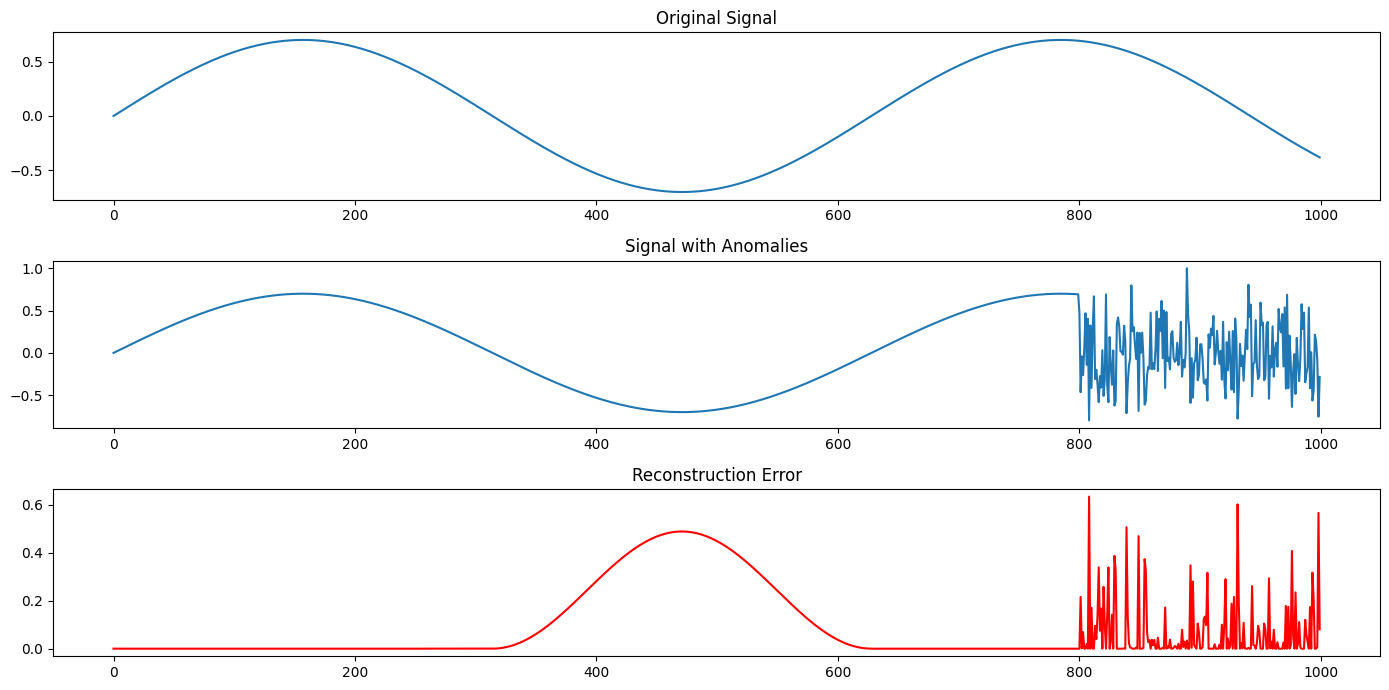

Detected anomalies at indices: [427 428 429 430 431 432 433 434 435 436 437 438 439 440 441 442 443 444
 445 446 447 448 449 450 451 452 453 454 455 456 457 458 459 460 461 462
 463 464 465 466 467 468 469 470 471 472 473 474 475 476 477 478 479 480
 481 482 483 484 485 486 487 488 489 490 491 492 493 494 495 496 497 498
 499 500 501 502 503 504 505 506 507 508 509 510 511 512 513 514 808 839
 849 931 976 998]


In [10]:
# Plot the original signal, signal with anomalies, and reconstruction error
plt.figure(figsize=(14, 7))
plt.subplot(3, 1, 1)
plt.title('Original Signal')
plt.plot(signal_normalized)

plt.subplot(3, 1, 2)
plt.title('Signal with Anomalies')
plt.plot(signal_with_anomalies_normalized)

plt.subplot(3, 1, 3)
plt.title('Reconstruction Error')
plt.plot(reconstruction_error, color='r')

plt.tight_layout()
plt.show()

# Detect anomalies based on reconstruction error
threshold = np.mean(reconstruction_error) + 2 * np.std(reconstruction_error)  # Adjust the threshold as needed
anomaly_indices = np.where(reconstruction_error > threshold)[0]

print(f"Detected anomalies at indices: {anomaly_indices}")


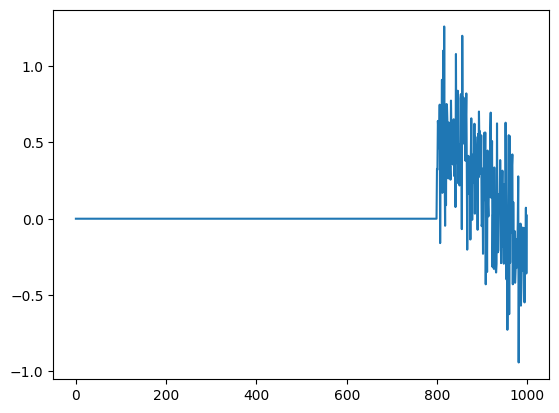

In [ ]:
plt.plot(signal_normalized- signal_with_anomalies_normalized)

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 509us/step - loss: 0.3143 
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step - loss: 0.1888
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0776 
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 532us/step - loss: 0.0634
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step - loss: 0.0607
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 532us/step - loss: 0.0629
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 541us/step - loss: 0.0594
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 532us/step - loss: 0.0591
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/step - loss: 0.0565
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step - loss: 0.0559
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 578us/step - loss: 0.0579
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 494us/step - loss: 0.0578
Epoch 13/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step - loss: 0.0615
Epoch 14/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step - loss: 0.0527
Epoch 15/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step - lo

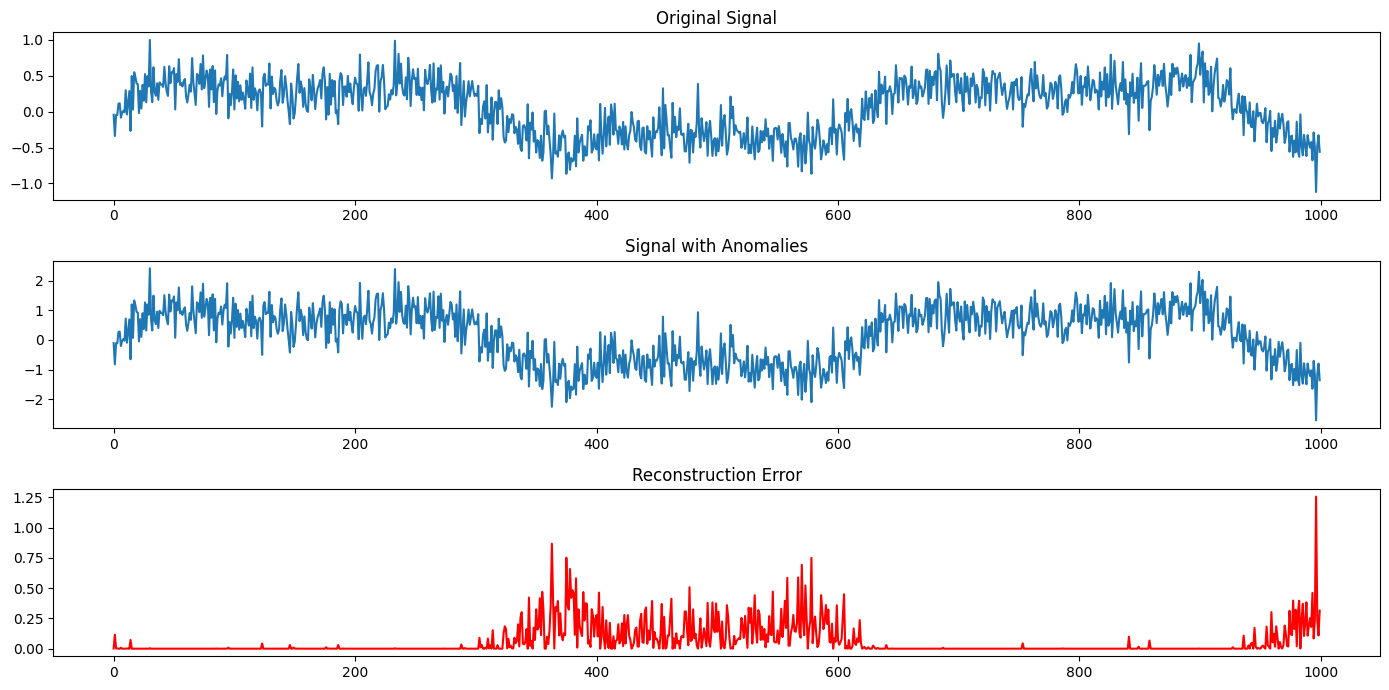

Detected anomalies at indices: [344 350 353 355 356 362 363 364 366 367 368 375 376 377 378 379 380 381
 383 385 389 391 392 396 402 405 440 441 446 454 462 474 477 480 492 496
 499 508 526 528 531 534 546 553 556 558 567 570 573 578 586 587 590 592
 599 605 974 977 979 982 985 988 993 996 999]


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Generate synthetic sinusoidal signal
t = np.linspace(0, 10, 1000)
signal = np.sin(t) + 0.5 * np.sin(3 * t) + 0.2 * np.sin(5 * t)  # Original signal

# Add anomalies to the signal
anomalies = np.random.normal(loc=0, scale=0.5, size=1000)  # Generate noise
signal_with_anomalies = signal + anomalies  # Signal with anomalies

# Normalize the signals
max_val = np.max(signal_with_anomalies)
signal_normalized = signal_with_anomalies / max_val

# Reshape the data
signal_data = np.reshape(signal_normalized, (signal_normalized.shape[0], 1))

# Build the autoencoder model
input_layer = Input(shape=(1,))
encoded = Dense(64, activation='relu')(input_layer)
encoded = Dense(32, activation='relu')(encoded)
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(1, activation='sigmoid')(decoded)

autoencoder = Model(input_layer, decoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder
autoencoder.fit(signal_data, signal_data, epochs=50, batch_size=32, shuffle=True)

# Predict on the signal data
predictions = autoencoder.predict(signal_data)

# Calculate the reconstruction error
reconstruction_error = np.mean(np.square(predictions - signal_data), axis=1)

# Plot the original signal, signal with anomalies, and reconstruction error
plt.figure(figsize=(14, 7))
plt.subplot(3, 1, 1)
plt.title('Original Signal')
plt.plot(signal_normalized)

plt.subplot(3, 1, 2)
plt.title('Signal with Anomalies')
plt.plot(signal_with_anomalies)

plt.subplot(3, 1, 3)
plt.title('Reconstruction Error')
plt.plot(reconstruction_error, color='r')

plt.tight_layout()
plt.show()

# Detect anomalies based on reconstruction error
threshold = np.mean(reconstruction_error) + 2 * np.std(reconstruction_error)  # Adjust the threshold as needed
anomaly_indices = np.where(reconstruction_error > threshold)[0]

print(f"Detected anomalies at indices: {anomaly_indices}")
